In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans


In [2]:
df_hotel = pd.read_csv("tripadvisor_hotel_reviews.csv")
df_hotel.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


# Count the proportion of rating

In [3]:
df_hotel['Rating'].value_counts(normalize=True)

5    0.441853
4    0.294715
3    0.106583
2    0.087502
1    0.069348
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Count of reviews by rating')

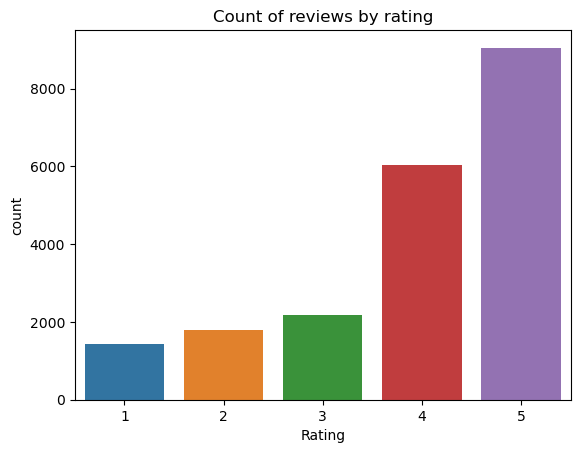

In [4]:
#Visualize the rating#
import seaborn as sns
sns.countplot(data=df_hotel, x='Rating')
plt.title('Count of reviews by rating')

### Widely-use sentiment analysis tool

In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to C:\Users\HU
[nltk_data]     ZEWEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\HU
[nltk_data]     ZEWEN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\HU
[nltk_data]     ZEWEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\HU
[nltk_data]     ZEWEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\HU
[nltk_data]     ZEWEN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
# Define a function to classify the sentiment of a review
sia = SentimentIntensityAnalyzer()

def get_sentiment(review):
    scores = sia.polarity_scores(review)
    sentiment_score = scores['compound']
    if sentiment_score > 0.1:
        return 'positive'
    elif sentiment_score < -0.1:
        return 'negative'
    else:
        return 'neutral'
    
# Apply function on dataset copy
df2 = df_hotel.copy()
df2['Predicted_Sentiment'] = df2['Review'].apply(get_sentiment)

# Print the number of positive, negative, and neutral reviews
print("Number of positive reviews:", len(df2[df2['Predicted_Sentiment'] == 'positive']))
print("Number of negative reviews:", len(df2[df2['Predicted_Sentiment'] == 'negative']))
print("Number of neutral reviews:", len(df2[df2['Predicted_Sentiment'] == 'neutral']))

Number of positive reviews: 18785
Number of negative reviews: 1531
Number of neutral reviews: 175


In [7]:
# Map the rating column to create new column true sentiment
df2['True_Sentiment'] = df2['Rating'].map({1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'})

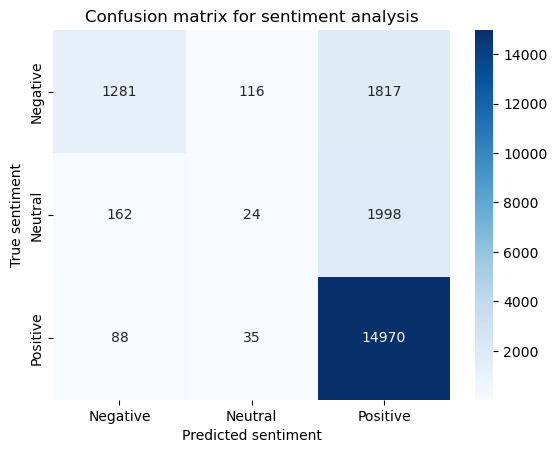

In [8]:
# Calculate confusion matrix
cm = confusion_matrix(df2['True_Sentiment'], df2['Predicted_Sentiment'])

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.title('Confusion matrix for sentiment analysis')
plt.show()

In [9]:
print("\nClassification report:\n", classification_report(df2['True_Sentiment'], df2['Predicted_Sentiment']))


Classification report:
               precision    recall  f1-score   support

    negative       0.84      0.40      0.54      3214
     neutral       0.14      0.01      0.02      2184
    positive       0.80      0.99      0.88     15093

    accuracy                           0.79     20491
   macro avg       0.59      0.47      0.48     20491
weighted avg       0.73      0.79      0.74     20491



###### Hence, we perform sentiment analysis on Review using SIA with 79% accuracy

# Use Pre-trained model to do sentiment analysis 

In [10]:
# Define function for new column sentiment
positive = [4, 5]
neutral = [3]
negative = [1, 2]

def map_sentiment(rating):
    if rating in positive:
        return 2
    elif rating in neutral:
        return 1
    else:
        return 0

df_hotel['Sentiment']= df_hotel['Rating'].apply(map_sentiment)
df_hotel.head()

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,2
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,1
3,"unique, great stay, wonderful time hotel monac...",5,2
4,"great stay great stay, went seahawk game aweso...",5,2


In [12]:
# Prepare data for modeling
#TF-IDF perform better than CountVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=10000, tokenizer = word_tokenize)
X = tfidf.fit_transform(df_hotel['Review'])
y = df_hotel['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=24)

### Naive Bayes Multinominal

In [13]:
# Build the model
nb = MultinomialNB()
nb.fit(X_train, y_train)

predicted_nb = nb.predict(X_test)

# Calculate accuracy and print classification report 
accuracy_nb = accuracy_score(y_test, predicted_nb)
print('Accuracy:', accuracy_nb)
print('Classification Report:')
print(classification_report(y_test, predicted_nb))

Accuracy: 0.832520007807925
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.68      0.74       810
           1       1.00      0.00      0.00       565
           2       0.84      0.99      0.91      3748

    accuracy                           0.83      5123
   macro avg       0.88      0.56      0.55      5123
weighted avg       0.85      0.83      0.78      5123



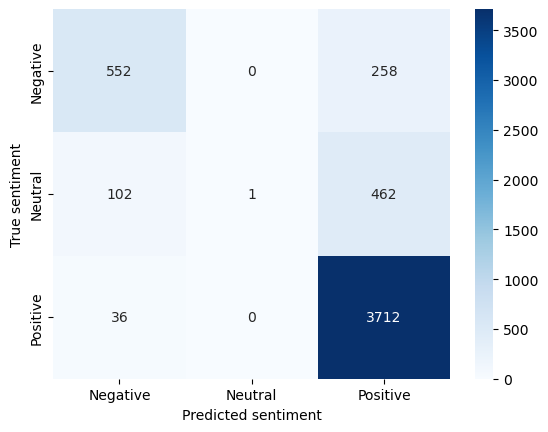

In [14]:
# Build confusion matrix
cm_nb = confusion_matrix(y_test, predicted_nb)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_nb, annot=True, cmap='Reds', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

### Logistic Regression

In [16]:
# Build model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

predicted_lr = lr.predict(X_test)

# Calculate accuracy and print classification report
accuracy_lr = accuracy_score(y_test, predicted_lr)
print('Accuracy:', accuracy_lr)
print('Classification Report:')
print(classification_report(y_test, predicted_lr))

Accuracy: 0.8590669529572517
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       810
           1       0.57      0.16      0.25       565
           2       0.88      0.99      0.93      3748

    accuracy                           0.86      5123
   macro avg       0.75      0.63      0.65      5123
weighted avg       0.83      0.86      0.83      5123



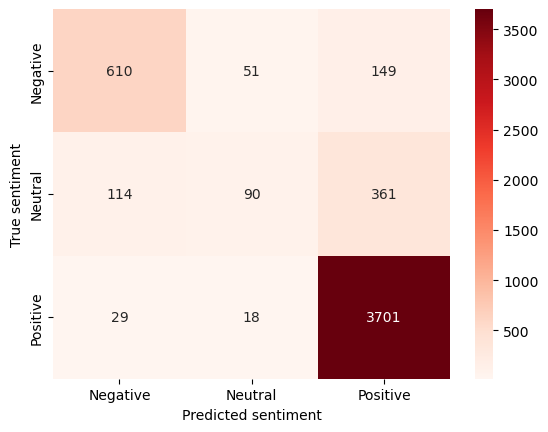

In [21]:
# Build confision matrix
cm_lr = confusion_matrix(y_test, predicted_lr)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_lr, annot=True, cmap='Reds', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

### Linear Support Vector Classification

In [18]:
# Build model
svc = LinearSVC(random_state=42)
svc.fit(X_train, y_train)

predicted_svc = svc.predict(X_test)

# Calculate accuracy and print classification report
accuracy_svc = accuracy_score(y_test, predicted_svc)
print('Accuracy:', accuracy_svc)
print('Classification Report:')
print(classification_report(y_test, predicted_svc))

Accuracy: 0.8577005660745657
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       810
           1       0.48      0.22      0.31       565
           2       0.90      0.97      0.93      3748

    accuracy                           0.86      5123
   macro avg       0.72      0.66      0.67      5123
weighted avg       0.83      0.86      0.84      5123



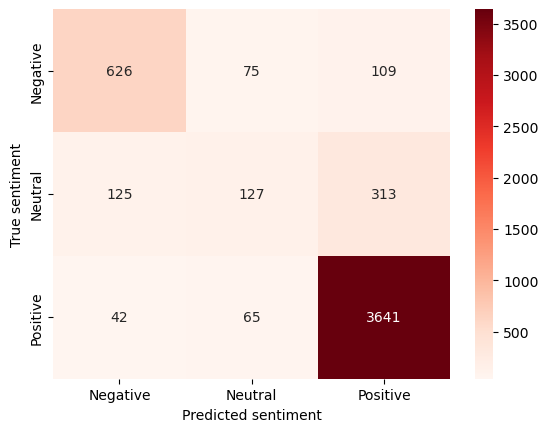

In [20]:
# Build confision matrix
cm_svc = confusion_matrix(y_test, predicted_svc)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_svc, annot=True, cmap='Reds', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

### CART(Classification And Regression Tree)

In [25]:
#Build Model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 3)
dtc.fit(X_train, y_train)

predicted_dtc = dtc.predict(X_test)

# Calculate accuracy and print classification report
accuracy_dtc = accuracy_score(y_test, predicted_dtc)
print('Accuracy:', accuracy_dtc)
print('Classification Report:')
print(classification_report(y_test, predicted_dtc))

Accuracy: 0.7569783330080031
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.40      0.45       810
           1       0.00      0.00      0.00       565
           2       0.79      0.95      0.86      3748

    accuracy                           0.76      5123
   macro avg       0.44      0.45      0.44      5123
weighted avg       0.66      0.76      0.70      5123



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


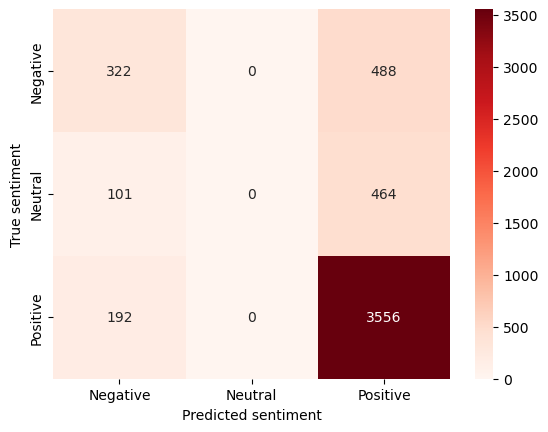

In [26]:
# Build confision matrix
cm_dtc = confusion_matrix(y_test, predicted_dtc)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_dtc, annot=True, cmap='Reds', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

# Random Forest

In [27]:
# Build the model
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X_train, y_train)

predicted_rf = rf.predict(X_test)

# Calculate accuracy and print classification report
accuracy_rf = accuracy_score(y_test, predicted_rf)
print('Accuracy:', accuracy_rf)
print('Classification Report:')
print(classification_report(y_test, predicted_rf))

Accuracy: 0.8085106382978723
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.50      0.64       810
           1       1.00      0.01      0.01       565
           2       0.80      1.00      0.89      3748

    accuracy                           0.81      5123
   macro avg       0.90      0.50      0.51      5123
weighted avg       0.84      0.81      0.75      5123



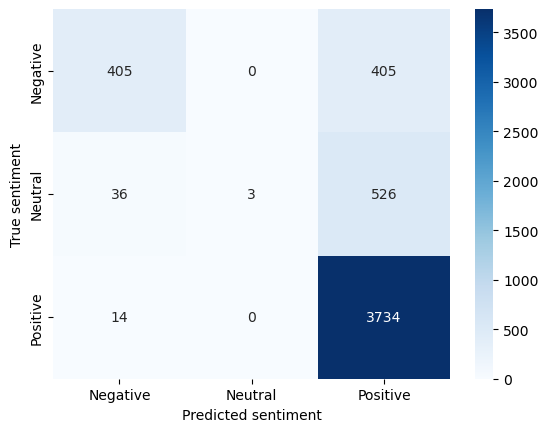

In [28]:
# Build confision matrix
cm_rf = confusion_matrix(y_test, predicted_rf)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

# Adaboost

In [39]:
# Build the model
ada =AdaBoostClassifier(n_eastimators = 500)
ada.fit(X_train,y_train)

predicted_ada = ada.predict(X_test)

# Calculate accuracy and print classification report 
accuracy_ada = accuracy_score(y_test, predicted_ada)
print('Accuracy:', accuracy_ada)
print('Classification Report:')
print(classification_report(y_test, predicted_ada))

Accuracy: 0.8206129221159477
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       810
           1       0.41      0.10      0.16       565
           2       0.85      0.96      0.90      3748

    accuracy                           0.82      5123
   macro avg       0.66      0.58      0.58      5123
weighted avg       0.78      0.82      0.79      5123



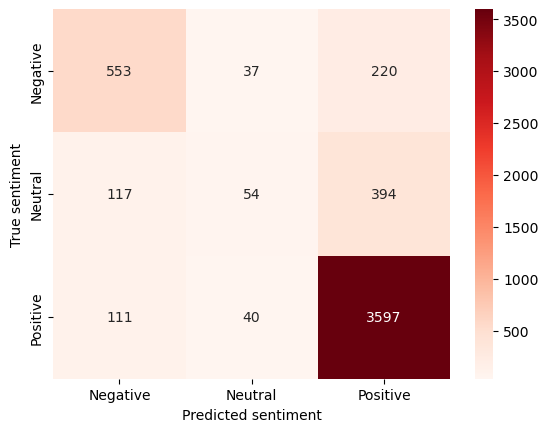

In [40]:
# Build confision matrix
cm_ada = confusion_matrix(y_test, predicted_ada)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_ada, annot=True, cmap='Reds', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

# Light GBM

In [35]:
import lightgbm as lgb

# Build the model
lgb =lgb.LGBMClassifier()
lgb.fit(X_train,y_train)

predicted_lgb = lgb.predict(X_test)

# Calculate accuracy and print classification report 
accuracy_lgb = accuracy_score(y_test, predicted_lgb)
print('Accuracy:', accuracy_lgb)
print('Classification Report:')
print(classification_report(y_test, predicted_lgb))

Accuracy: 0.8537966035526059
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       810
           1       0.54      0.22      0.31       565
           2       0.88      0.98      0.93      3748

    accuracy                           0.85      5123
   macro avg       0.74      0.64      0.67      5123
weighted avg       0.83      0.85      0.83      5123



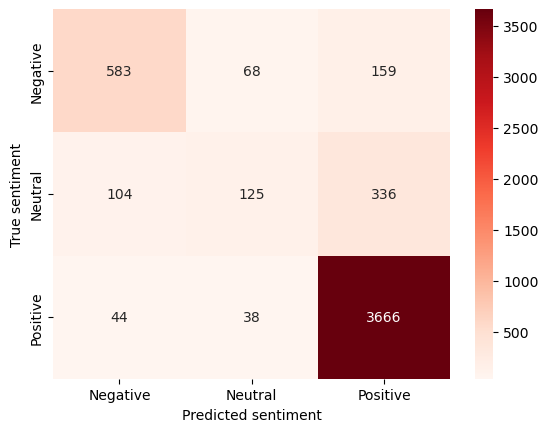

In [37]:
# Build confision matrix
cm_lgb = confusion_matrix(y_test, predicted_lgb)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_lgb, annot=True, cmap='Reds', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

# Wordcloud For N,N,P Reviews

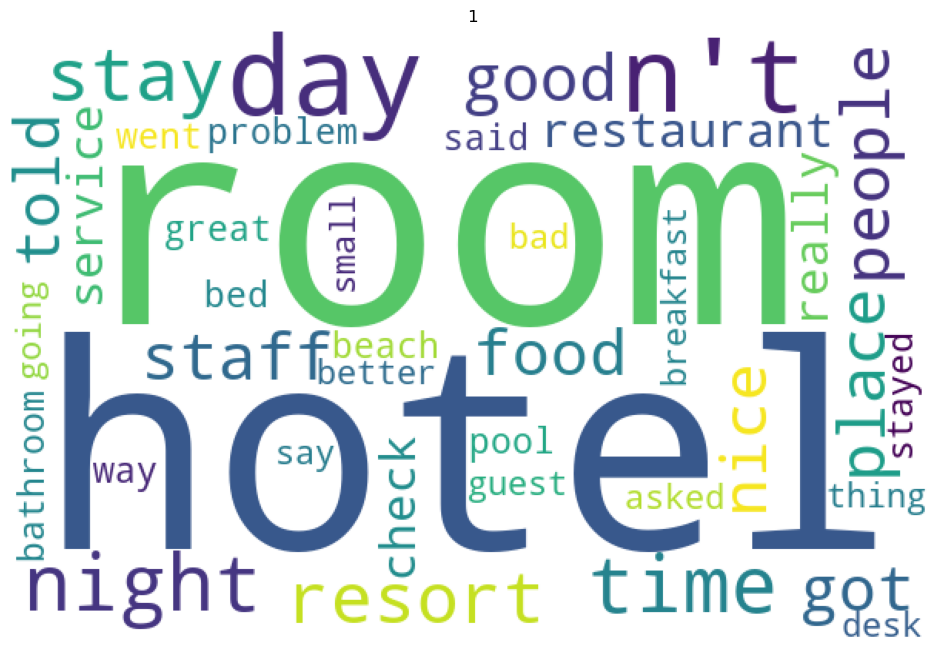

In [53]:
from wordcloud import WordCloud
df_neg = df_hotel[df_hotel['Rating'] <= 2]
text=' '.join(df_neg['Review'])
wc1 = WordCloud( width=600, height=400, max_words=40, background_color='white').generate(text)
plt.figure(figsize=[12, 8])
plt.imshow(wc1)
plt.title(1)
plt.axis('off')
plt.savefig('wordcloud1.png', dpi=300, bbox_inches='tight')

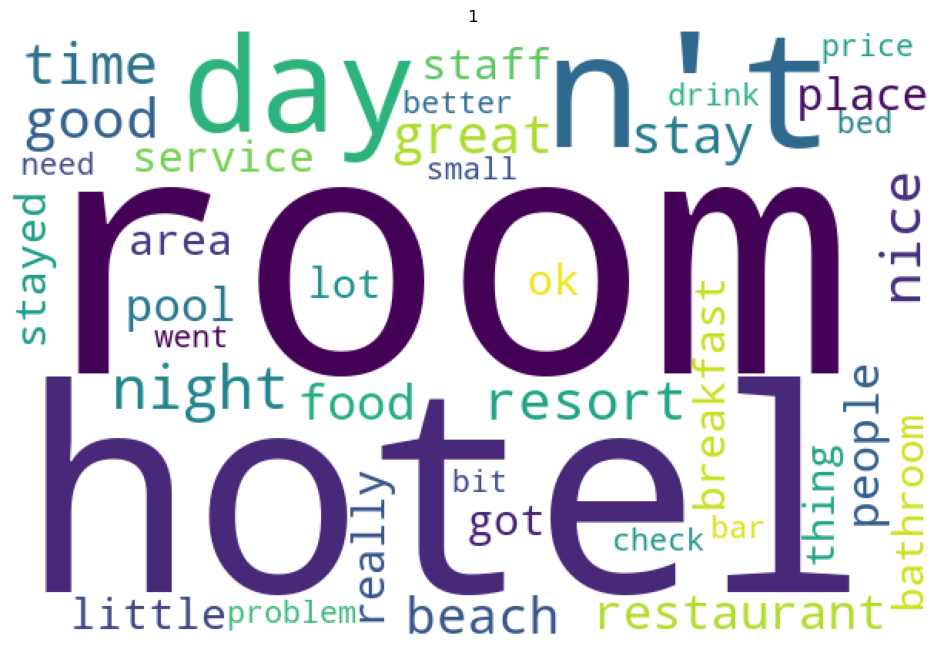

In [55]:
from wordcloud import WordCloud
df_neu = df_hotel[df_hotel['Rating'] == 3]
text=' '.join(df_neu['Review'])
wc2 = WordCloud( width=600, height=400, max_words=40, background_color='white').generate(text)
plt.figure(figsize=[12, 8])
plt.imshow(wc2)
plt.title(1)
plt.axis('off')
plt.savefig('wordcloud2.png', dpi=300, bbox_inches='tight')

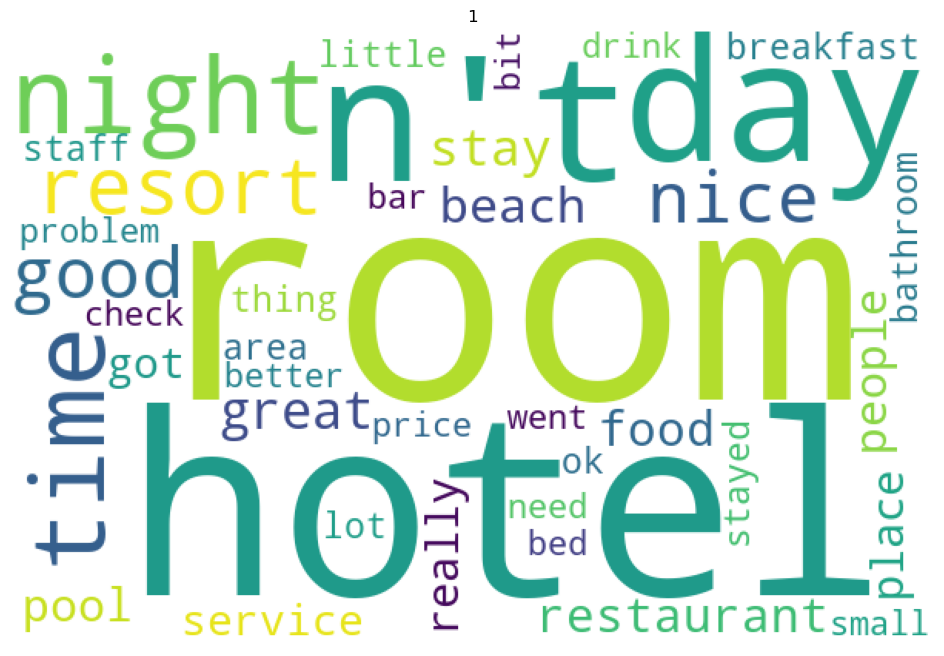

In [56]:
from wordcloud import WordCloud
df_pos = df_hotel[df_hotel['Rating'] >= 4]
text=' '.join(df_neu['Review'])
wc3 = WordCloud( width=600, height=400, max_words=40, background_color='white').generate(text)
plt.figure(figsize=[12, 8])
plt.imshow(wc3)
plt.title(1)
plt.axis('off')
plt.savefig('wordcloud3.png', dpi=300, bbox_inches='tight')

In [67]:
# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)

In [68]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)